<a href="https://colab.research.google.com/github/EugIva/ProzorovEI109m_labsML/blob/main/ML_labs/1_semestr/1lab_2/ProzorovEI109_ML_1sem_2lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----
 ####        ___Лабораторная работа №2___
#### ___📄 Глобальная оптимизация и метаэврестические алгоритмы___  #

----

> ___Лабораторная работа №2___           по курсу Фундаментальные концепции ИИ (ML)       
>🎓  Прозоров Евгений Иванович 109М    
>📧 eugene_ivanson@mail.ru       
>tg: @EugIva           

___Описание задачи:___
Источник:  https://github.com/resi2311/AI-fundamentals#лабораторные-работы    
Глобальная оптимизация и метаэврестические алгоритмы:

В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [1]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 74.7 MB/s eta 0:00:00


In [2]:
import pygmo as pg

import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
import seaborn as sns
import pandas as pd

from pygmo import *
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd


import matplotlib
from matplotlib import ticker as mtick

from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm

# Функция Матьяса

Поиск глобального минимума через pygmo -   

     Simple Genetic Algorithm

In [3]:
def matyas(x: np.array, y: np.array) -> float:
  return 0.26 * (x * x + y * y) - 0.48 * x * y

class Matyas():
  @staticmethod
  def fitness(x):
      return [0.26 * (x[0] * x[0] + x[1] * x[1]) - 0.48 * x[0] * x[1]]

  @staticmethod
  def get_bounds():
      return ([-10, -10], [10, 10])

  @staticmethod
  def gradient(self, x):
      return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

In [4]:
algo = pg.algorithm(pg.sga(gen=1000))
prob = pg.problem(Matyas())
print(prob)

pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

Problem name: <class '__main__.Matyas'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none

[1.31284567e-05]


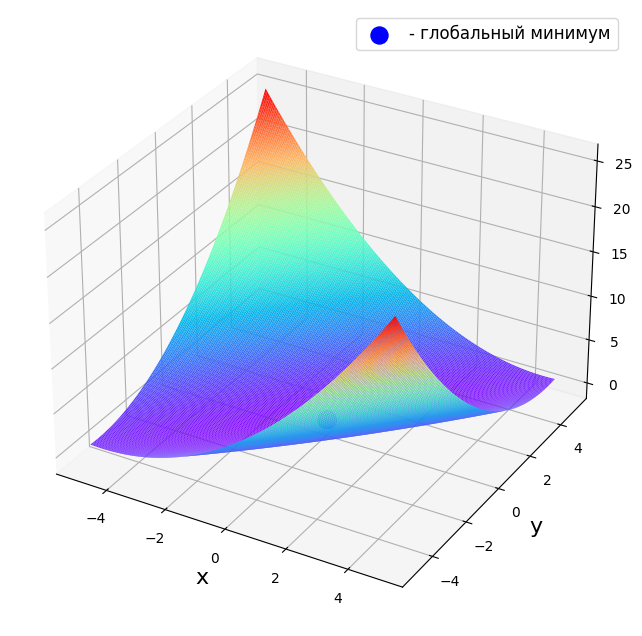

In [21]:
#Points function graph
#размеры фигуры и оси для графика в трехмерном пространстве.
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
#поверхность на основе данных X, Y, Z.
X, Y = np.meshgrid(xDraw, yDraw)
Z = matyas(X, Y)

#Global minimum graph
fig = plt.figure(figsize=(12,8))
axes1 = fig.add_subplot(projection = '3d')
# rstride и cstride задают шаг между значениями по осям x и y соответственно
#linewidth задает толщину линий на графике, а antialiased включает сглаживание.
axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap= 'rainbow', linewidth=1, antialiased=True)
axes1.set_xlabel('x', fontsize=16)
axes1.set_ylabel('y', fontsize=16)
axes1.set_zlabel('z', fontsize=16)
#данные для точек на графике вычисляются из объекта pop.
x = pop.get_x()[:,0] #возвращает значения первого столбца x,
y = pop.get_x()[:,0] #возвращает значения первого столбца y
z = pop.get_f()[:,0] #возвращает значения первого столбца z
#рисует точки на графике с помощью функции scatter3D
#xyz определяют координаты точек, s размер точек, c цвет точек, label  подпись
axes1.scatter3D(x, y, z, s=150, c='b', label ='- глобальный минимум')
axes1.legend(fontsize=12)
plt.show()

# Функция Матьяса

Поиск глобального минимума через pygmo -

    Self-adaptive Differential Evolution

In [23]:
algo = pg.algorithm(pg.sade(gen=1000))
prob = pg.problem(Matyas())
print(prob)

pop = pg.population(prob, 1000)
pop = algo.evolve(pop)
print(pop.champion_f)

Problem name: <class '__main__.Matyas'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0
	Gradient evaluations: 0

	Thread safety: none

[1.17274129e-16]


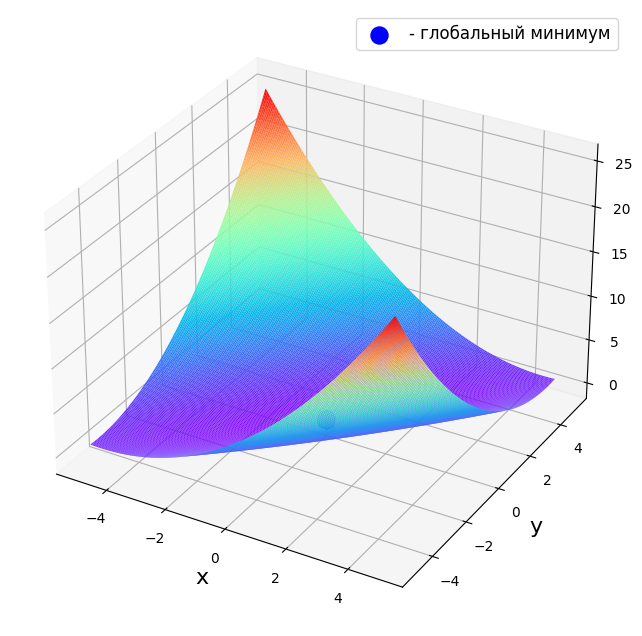

In [26]:
#Points function graph
xDraw = np.linspace(-5, 5, num=200)
yDraw = np.linspace(-5, 5, num=200)
X, Y = np.meshgrid(xDraw, yDraw)
Z = matyas(X, Y)

#Global minimum graph
fig = plt.figure(figsize=(12,8))
axes1 = fig.add_subplot(projection = '3d')
axes1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow', linewidth=1, antialiased=True)
axes1.set_xlabel('x', fontsize=16)
axes1.set_ylabel('y', fontsize=16)
axes1.set_zlabel('z', fontsize=16)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
axes1.scatter3D(x, y, z, s=150, c='b', label ='- глобальный минимум')
axes1.legend(fontsize=12)
plt.show()